# **Praktikum 3 MA2271 - Shift 3**
**24 Februari 2023**

Nama : *Tim Asisten MA2271*\
NIM :



# **Nomor 1**

Diberikan persamaan diferensial

$$
y^{(4)} + 2y'' + y = \sin t
$$

yang memiliki nilai awal $y(0) = 2$, $y'(0) = 0$, $y''(0) = -1$, dan $y'''(0) = 1$.



## **Nomor 1A**

Tentukan solusi umum dan solusi khusus dari persamaan diferensial tersebut.

In [ ]:
from sympy import *
from sympy.abc import t
y = Function('y')
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Solusi Umum
sol = dsolve(Derivative(y(t),t,t,t,t) + 2*Derivative(y(t),t,t) + y(t) - sin(t), y(t))
print('Solusi Umum : ')
sol

Solusi Umum : 


Eq(y(t), (C1 + C2*t)*cos(t) + (C3 + t*(C4 - t/8))*sin(t))

In [ ]:
# Solusi Khusus

diff1 = sol.rhs.diff(t) # y'
diff2 = diff1.diff(t)   # y''
diff3 = diff2.diff(t)   # y'''

# Kondisi Awal
cond1 = Eq(sol.rhs.subs(t,0), 2) # y(0) = 2
cond2 = Eq(diff1.subs(t,0), 0)   # y'(0) = 0
cond3 = Eq(diff2.subs(t,0), -1)  # y''(0) = -1
cond4 = Eq(diff3.subs(t,0), 1)   # y'''(0) = 1

# Mencari Nilai Konstanta
C1, C2, C3, C4 = symbols("C1, C2, C3, C4")
constants = solve([cond1, cond2, cond3, cond4], (C1, C2, C3, C4))

# Mencari Solusi Khusus
ans = sol.subs(constants)
print('Solusi Khusus : ')
ans

Solusi Khusus : 


Eq(y(t), (2 - 7*t/8)*cos(t) + (t*(1/2 - t/8) + 7/8)*sin(t))

## **Nomor 1B**

Gambarkan sketsa solusi masalah nilai awal tersebut untuk $-10 \leq t \leq 15$.

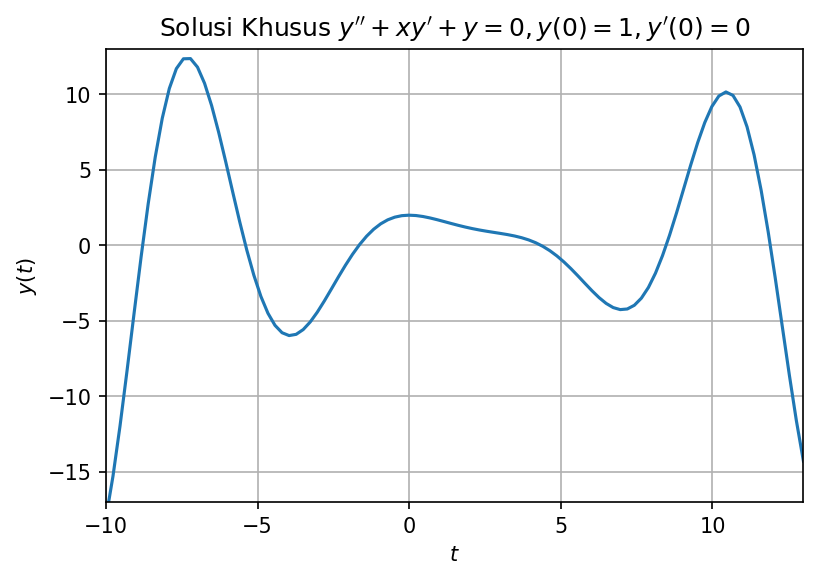

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

ans_func = lambdify(t, ans.rhs)

ts = np.linspace(-10,13,100)
plt.plot(ts, ans_func(ts))
plt.xlim([-10,13])
plt.ylim([-17,13])
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title("Solusi Khusus $y'' + xy' + y = 0, y(0) = 1, y'(0) = 0$")
plt.grid('on')
plt.show()

# **Nomor 2**

Perhatikan sistem pegas-massa-redaman

$$
mu'' + cu' + ku = F(t)
$$

dengan $u$ menyatakan simpangan pegas, $m$ menyatakan massa benda, $c$ menyatakan koefisien redaman, dan $k$ menyatakan konstanta pegas.
\
\
Misalkan diketahui $m = 1$, $c = 2$, $k = 5$, $F(t) = 3 \cos (4t)$, serta nilai awal $u(0) = 0.5$ dan $u'(0) = 0$.

## **Nomor 2A**

Tentukan solusi homogen dari sistem di atas.

In [ ]:
from sympy import *
from sympy.abc import t
u = Function('u')
m = 1
c = 2
k = 5
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

sistem = m*Derivative(u(t),t,t) + c*Derivative(u(t),t) + k*u(t)

sol_h = dsolve(sistem, u(t)).rhs
cnd1_h = Eq(sol_h.subs(t, 0), 0.5)
cnd2_h = Eq(sol_h.diff(t).subs(t, 0), 0)

C1, C2 = symbols("C1, C2")
C1C2_h = solve([cnd1_h, cnd2_h], (C1,C2))
ans_h = sol_h.subs(C1C2_h)

print("Solusi Homogen: ")
ans_h

Solusi Homogen: 


(0.25*sin(2*t) + 0.5*cos(2*t))*exp(-t)

## **Nomor 2B**

Tentukan solusi khusus dari masalah sistem pegas-massa-redaman tersebut.

In [ ]:
from sympy import *
from sympy.abc import t
u = Function('u')
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

F = 3*cos(4*t)

sol_k = dsolve(sistem - F, u(t)).rhs
cnd1_k = Eq(sol_k.subs(t, 0), 0.5)
cnd2_k = Eq(sol_k.diff(t).subs(t, 0), 0)

C1, C2 = symbols("C1, C2")
C1C2_k = solve([cnd1_k, cnd2_k], (C1,C2))
ans_k = sol_k.subs(C1C2_k)

print("Solusi Khusus: ")
ans_k

Solusi Khusus: 


(0.0797297297297297*sin(2*t) + 0.678378378378378*cos(2*t))*exp(-t) + 24*sin(4*t)/185 - 33*cos(4*t)/185

## **Nomor 2C**

Gambarkan kurva solusi khusus permasalahan sistem ini beserta kurva amplopnya jika ada.

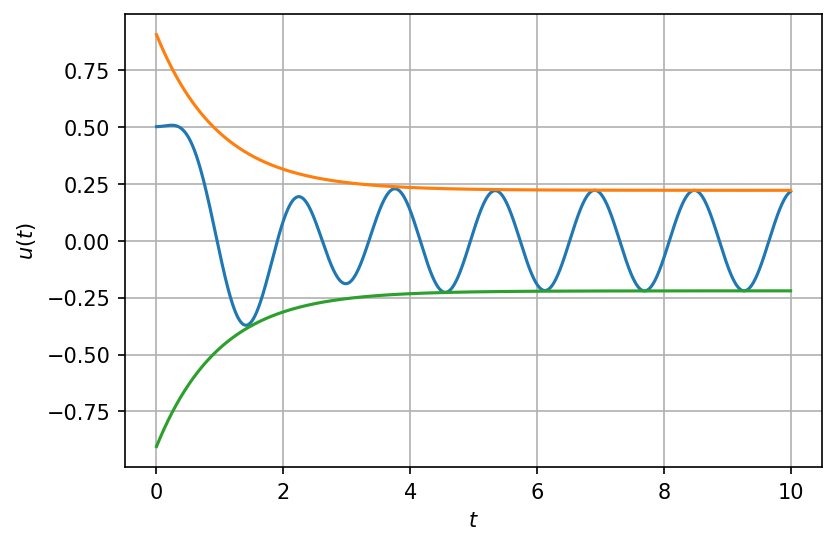

In [ ]:
from sympy import *
from sympy.abc import t
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

ans_k_func = lambdify(t,ans_k)

# Envelope curve
A = 0.0797297297297297
B = 0.678378378378378
C = 24/185
D = -33/185
envelope = lambda t : np.sqrt((A*np.exp(-t))**2+(B*np.exp(-t))**2) + np.sqrt(C**2 + D**2)

t1 = np.linspace(0, 10, 2000)
plt.plot(t1, ans_k_func(t1))
plt.plot(t1, envelope(t1))
plt.plot(t1, -envelope(t1))
plt.grid('on')
plt.xlabel("$t$")
plt.ylabel("$u(t)$")
plt.show()

Perhatikan bahwa solusi khusus yang diperoleh memiliki bentuk

\begin{align*}
y(t) &= \color{green}{[A\sin(\omega t) + B\cos(\omega t)]e^{-t}} + \color{red}{C\sin(2\omega t) + D\cos(2\omega t)}
\end{align*}

yang merupakan penjumlahan dari solusi transien (hijau) dan solusi  steady state (merah). Untuk itu, kurva amplop dari solusi khusus juga dapat diperoleh dengan menjumlahkan kurva amplop dari solusi transien dan kurva amplop dari solusi steady statenya.
\begin{align*}
K(t) &= \color{green}{\sqrt{(Ae^{-t})^{2} + (Be^{-t})^{2}}} + \color{red}{\sqrt{C^{2} + D^{2}}}.
\end{align*}

Ketika $t → ∞$, respon solusi transien akan meluruh dan mendekati nol sehingga menyisakan solusi steady state yang responnya masih ada untuk waktu yang lama.

## **Nomor 2D**

Apakah sistem ini menghasilkan fenomena resonansi? Jelaskan.

**Jawab:**

Berdasarkan jawaban dari soal Nomor 2D, terlihat bahwa simpangan $u(t)$ awalnya akan mengecil, lalu mulai nilai $t$ tertentu simpangannya selalu tetap sehingga sistem ini **tidak** menghasilkan resonansi. Selain itu, hal ini juga dapat dilihat dari suku tak homogen persamaan diferensial yakni $F(t) = 3 \cos (4t)$ yang merupakan gelombang monokromatik yang berbeda dengan solusi homogen persamaan diferensialnya.